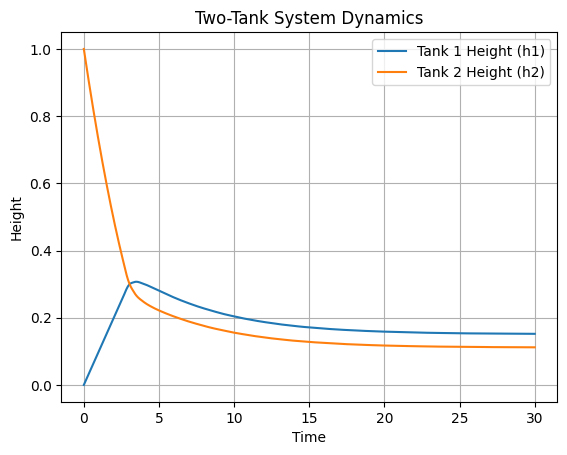

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
A1 = 1.0      # Area of tank 1
A2 = 1.0      # Area of tank 2
k1 = 0.5      # Flow coefficient from tank 1 to tank 2
k2 = 0.3      # Outflow coefficient from tank 2

# Inflow function (can be modified)
def q_in(t):
    return 0.1  # Constant inflow, or e.g., 1.0 + 0.5*np.sin(t)

# System of ODEs
def two_tank_ode(t, h):
    h1, h2 = h
    h1 = max(h1, 0.0)  # prevent negative heights
    h2 = max(h2, 0.0)

    flow12 = k1 * np.sqrt(max(h1 - h2, 0))
    outflow = k2 * np.sqrt(h2)

    dh1dt = (q_in(t) - flow12) / A1
    dh2dt = (flow12 - outflow) / A2

    return [dh1dt, dh2dt]

# Initial conditions
h0 = [0.0, 1.0]  # Initial heights in both tanks

# Time span
t_span = (0, 30)
t_eval = np.linspace(*t_span, 1000)

# Solve ODE
sol = solve_ivp(two_tank_ode, t_span, h0, t_eval=t_eval, method='RK45')

# Plotting
plt.plot(sol.t, sol.y[0], label='Tank 1 Height (h1)')
plt.plot(sol.t, sol.y[1], label='Tank 2 Height (h2)')
plt.xlabel('Time')
plt.ylabel('Height')
plt.title('Two-Tank System Dynamics')
plt.legend()
plt.grid(True)
plt.show()


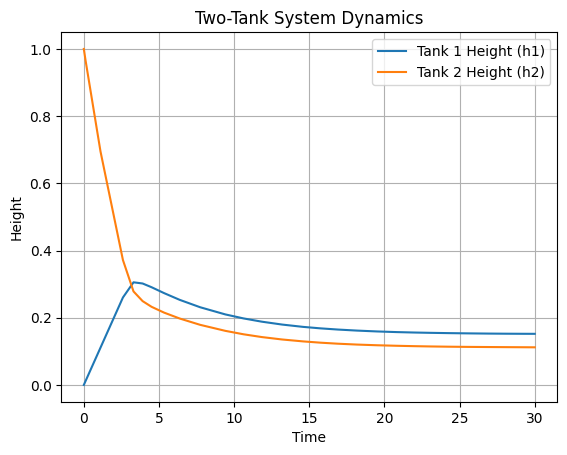

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
A1 = 1.0      # Area of tank 1
A2 = 1.0      # Area of tank 2
k1 = 0.5      # Flow coefficient from tank 1 to tank 2
k2 = 0.3      # Outflow coefficient from tank 2

# Inflow function (can be modified)
def q_in(t):
    return 0.1  # Constant inflow, or e.g., 1.0 + 0.5*np.sin(t)

# System of ODEs
def two_tank_ode(t, h):
    h1, h2 = h
    h1 = max(h1, 0.0)  # prevent negative heights
    h2 = max(h2, 0.0)

    flow12 = k1 * np.sqrt(max(h1 - h2, 0))
    outflow = k2 * np.sqrt(h2)

    dh1dt = (q_in(t) - flow12) / A1
    dh2dt = (flow12 - outflow) / A2

    return [dh1dt, dh2dt]

# Initial conditions
h0 = [0.0, 1.0]  # Initial heights in both tanks

# Time span
t_span = (0, 30)
t_eval = np.arange(t_span[0], t_span[1] + 1, 1)

# Solve ODE
sol = solve_ivp(two_tank_ode, t_span, h0, method='RK45')

# Plotting
plt.plot(sol.t, sol.y[0], label='Tank 1 Height (h1)')
plt.plot(sol.t, sol.y[1], label='Tank 2 Height (h2)')
plt.xlabel('Time')
plt.ylabel('Height')
plt.title('Two-Tank System Dynamics')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import src.models as models
%load_ext autoreload
%autoreload 2

Models imported succesfully


In [4]:
TT = models.TwoTanks(True)

In [5]:
TT.describe()

Model Name:  Two Tank System with Interaction


In [19]:
u1 = np.ones(100)*1
u2 = np.ones(100)*0.0
Ts = 1
h10, h20 = 0, 1
res = TT.simulate(h10, h20, u1, u2, Ts)

In [20]:
import pandas as pd


In [21]:
df = pd.DataFrame(res)
df.head()

,h1,h2,u1,u2
0,0.965432,0.756157,1.0,0.0
1,1.609931,0.845742,1.0,0.0
2,2.126454,1.038823,1.0,0.0
3,2.577667,1.265918,1.0,0.0
4,2.986128,1.504538,1.0,0.0


<Axes: >

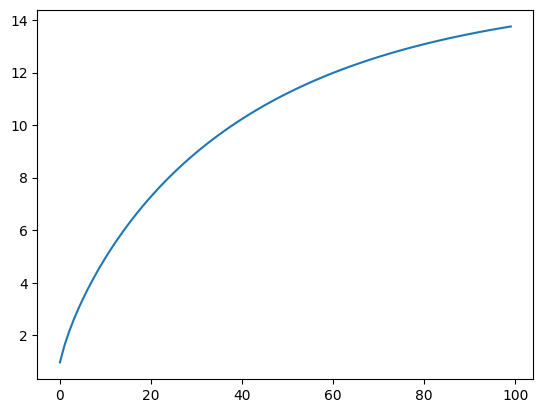

In [22]:
df["h1"].plot()

<Axes: >

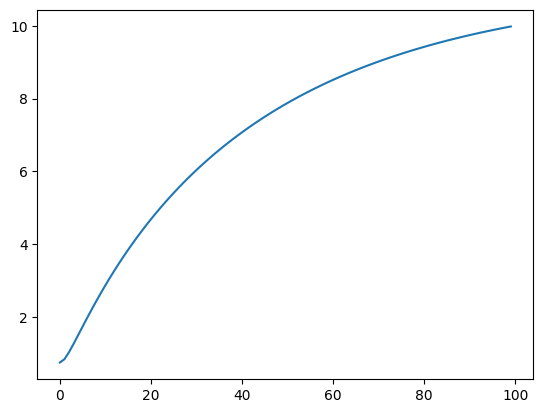

In [23]:
df["h2"].plot()